<a href="https://colab.research.google.com/github/Malachy-Jennings/Year-2-Lab/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Structured Programming Coursework: assignment 2

This is due in on Friday December 9th before 2pm. Mark weighting is in brackets. Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

Save your work to GitHub after having run all cells with `Runtime`->`Restart and run all`. You should then do `File`->`Save a copy in GitHub`, do remember to keep the same filename and work directly in the `assignment_2.ipynb` worksheet, adding as many code cells as needed. You can (and should) save as often as possible, only the latest version uploaded before the deadline will be marked.

Your submitted work must abide by university regulations regarding plagiarism. You are encouraged to discuss the work with your classmates, but your submitted work must be written by you alone. You are welcome to copy and paste code from online sources, but you must cite your sources.

## Exercise 1 

A flat metal sheet has the shape of an equilateral triangle of side length 4 metre. The area density of the sheet changes with the distance $r$ from the centre of the triangle according to the formula $\rho = 2.28\,\left|\, \sin({5.8\,r})\,\right|\,kg\,m^{−2}$ (`rho=2.28*|sin(5.8r)|`).
**Use the Monte Carlo (MC) method** to evaluate:

 1. [4] the area of the triangle
 
 2. [6] the mass of the triangle.

In doing so, plot an illustrative figure to show the triangle and how points are selected in the MC method (similar to the figure you made for question 2 of week 6). You will need to decide on a suitable number of points for the illustration, and for the calculation of the integral.
**Hints**: re-read the worksheet for week 6 "Monte Carlo" carefully. Avoid loops wherever possible - it is much faster to operate with arrays of data in Python. You can solve this analytically to check your answer if you want to, but the question asks for a Monte-Carlo solution.

In [3]:
import numpy as np
from numpy.random import random, normal, seed 
import matplotlib.pyplot as plt

6.9216


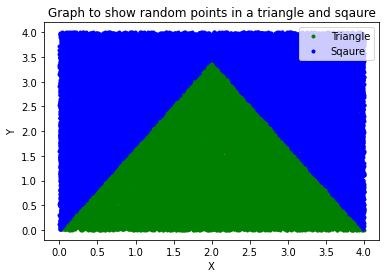

In [30]:
#1a)
#Total number of points
N = 50000

#random y and x values between 0 and 4, this gives us a sqaure of side length 4 encapusating the triangle
x = random(N) * 4
y = random(N) * 4

#Parameters for the triangle set up if the triangle's left corner starts at 0,0 and has a line going along the x-axis. 
Y_limit = y <= 2*(3**0.5)
Left_Slope = x >= 1 / (3**0.5) * y 
Right_Slope = x <= 4 - (1 / 3**0.5 * y)

#Combining all the boolean conditions for the points. Must use '&' instead of 'and' as 'and' only applies to singular values and has less mathematical applications.
Triangle = Y_limit & Left_Slope & Right_Slope

plt.plot(x[Triangle==True], y[Triangle==True],'g.', label ='Triangle')
plt.plot(x[Triangle==False], y[Triangle==False],'b.', label = 'Sqaure')
plt.title('Graph to show random points in a triangle and sqaure')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(loc='upper right')
n = len(x[Triangle==True])

Triangle_area = n/N * 16
print(Triangle_area)

In [31]:
#1b)
#Setting up the variable radius using pythagorean theorem
r = ((x[Triangle==True]-2)**2 + (y[Triangle==True] - 2/(2*(3**0.5)))**2)**0.5
#Equation for density
rho = 2.28*np.abs(np.sin(5.8*r))
#To work out Mass
Mass = sum(Triangle_area/n * rho)
print(f"{Mass:.3f} kg")

10.219 kg


## Exercise 2

 1. [6] Using the 1-D `walk()` function from week 7 "Monte Carlo 2" as guidance, write code to plot out a 2-D random walk (i.e. step in one of four possible directions each time step) to the screen. Use the up-down and left-right directions, not in diagonal.

 2. [4] Plot a graph to show the mean squared position as a function of step number for multiple walks as you did for the 1-D case.


In [32]:
#2a)
def walk(steps):
    '''
    steps is the length of the 2-D random walk vector returned
    '''
    Walk_2D = np.zeros((steps, 2), int)  # initialise the 2-D array of integers
    
    for i in range(1, steps):
      rand = random()
      if(rand<0.25):
        Walk_2D[i] = Walk_2D[i-1] + [1, 0] #Right in the x direction
      elif(0.25<rand<0.5):
        Walk_2D[i] = Walk_2D[i-1] - [1, 0] #Left in the x direction
      elif(0.5<rand<0.75):
        Walk_2D[i] = Walk_2D[i-1] + [0, 1] #Up in the y direction
      else:
        Walk_2D[i] = Walk_2D[i-1] - [0, 1] #Down in the y direction

    x_walk = Walk_2D[:,0] #first column
    y_walk = Walk_2D[:,1] #second column

    return x_walk, y_walk


Text(0, 0.5, 'Y')

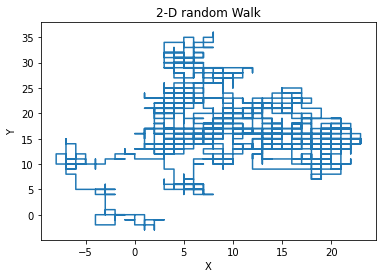

In [36]:
Walk_data = walk(2000) #2000 steps
#x and y arrays
walk_x = Walk_data[0]
walk_y = Walk_data[1]

plt.plot(walk_x, walk_y)
plt.title('2-D random Walk')
plt.xlabel('X')
plt.ylabel('Y')

In [43]:
#2b)
#Need to edit function to incorporate mean sqaured position as a function of steps

def walk(steps):
    '''
    steps is the length of the 2-D random walk vector returned
    '''
    Walk_2D = np.zeros((steps, 2), int)  # initialise the 2-D array of integers
    
    for i in range(1, steps):
      rand = random() #different random value for each loop
      if(rand<0.25):
        Walk_2D[i] = Walk_2D[i-1] + [1, 0] #Right in the x direction
      elif(0.25<rand<0.5):
        Walk_2D[i] = Walk_2D[i-1] - [1, 0] #Left in the x direction
      elif(0.5<rand<0.75):
        Walk_2D[i] = Walk_2D[i-1] + [0, 1] #Up in the y direction
      else:
        Walk_2D[i] = Walk_2D[i-1] - [0, 1] #Down in the y direction

    x_walk = Walk_2D[:,0] #first column
    y_walk = Walk_2D[:,1] #second column

    r=np.zeros(steps) #initialising R array of pythagorean distance at each step
    r[0] #First position set to 0

    for i in range(1, steps):
      r[i] = (x_walk[i]**2 + y_walk[i]**2)**0.5

    return x_walk, y_walk, r

Text(0, 0.5, 'Y')

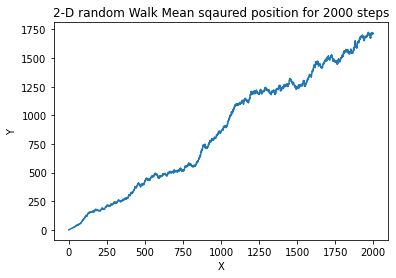

In [45]:
parts = np.zeros((2000, 50), int) #sets up step number by 50 array

for i in range(50):
  parts[:,i] = walk(2000)[2] #calls out r

mean_pos_sqaure =[] #initialising array

for i in range(2000):
  mean_pos_sqaure.append(np.mean((parts[i,:])**2)) #mean sqaured position

plt.plot(mean_pos_sqaure)
plt.title('2-D random Walk Mean sqaured position for 2000 steps')
plt.xlabel('X')
plt.ylabel('Y')